<a href="https://colab.research.google.com/github/TusharGwal/Machine-Learning/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

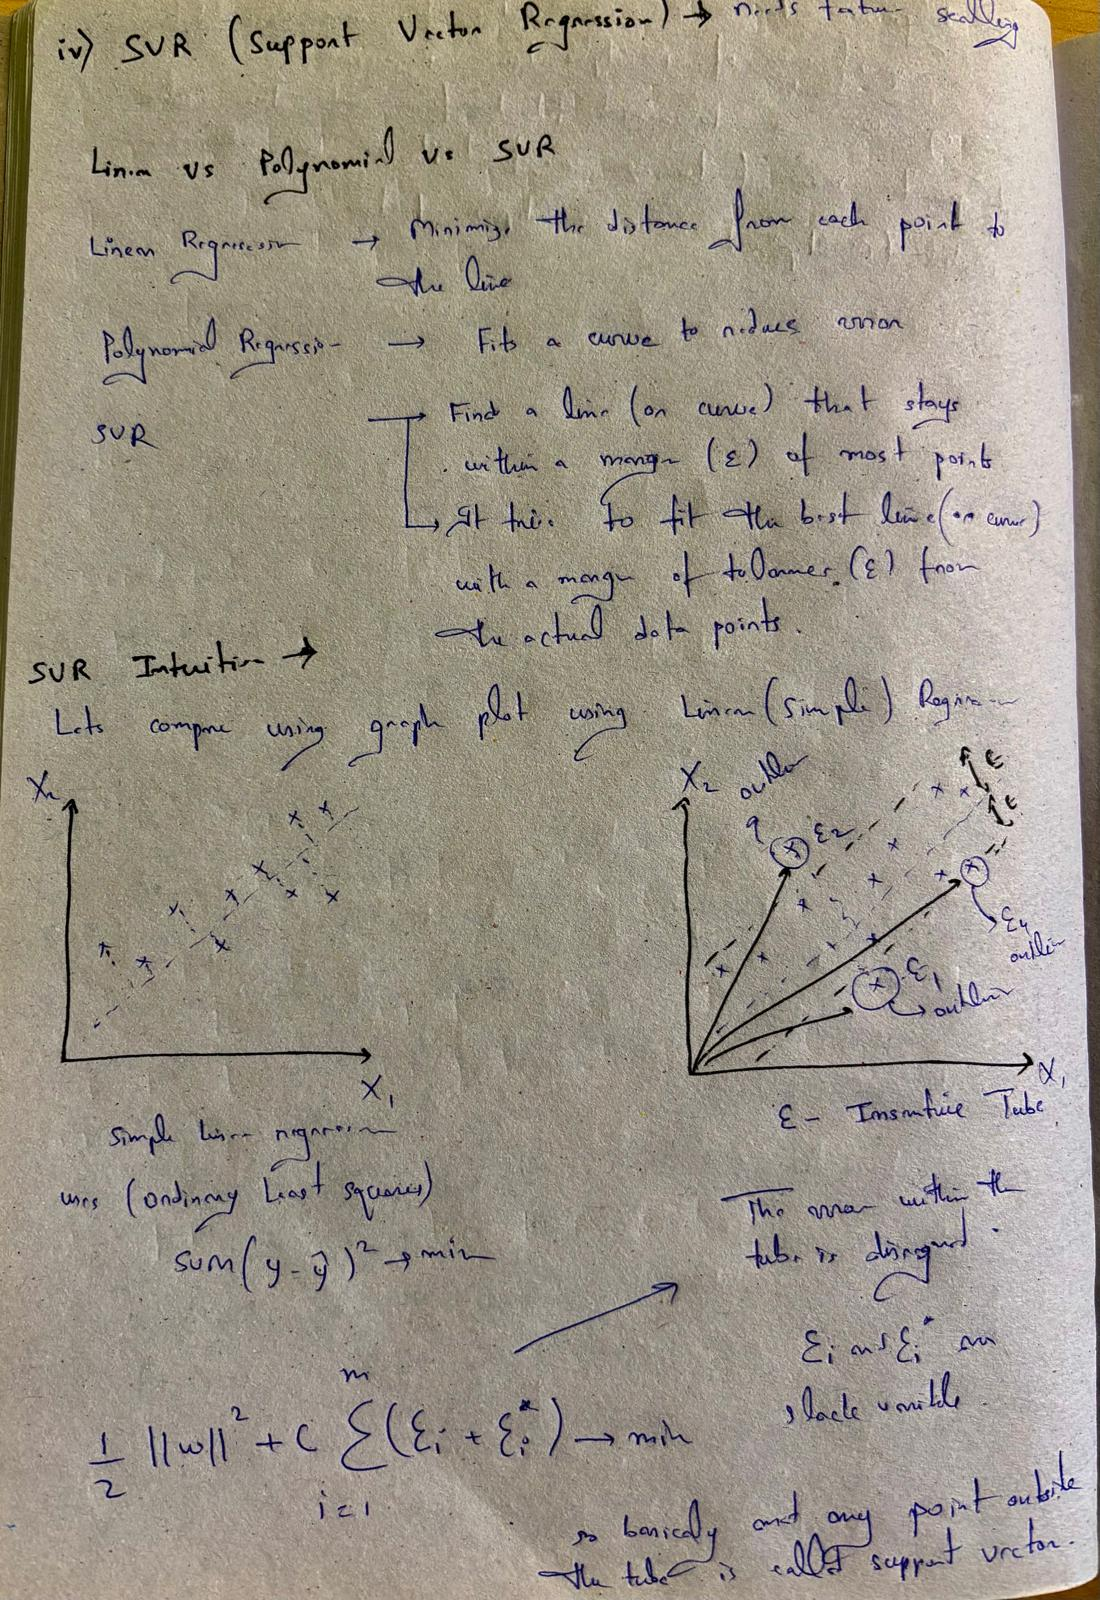

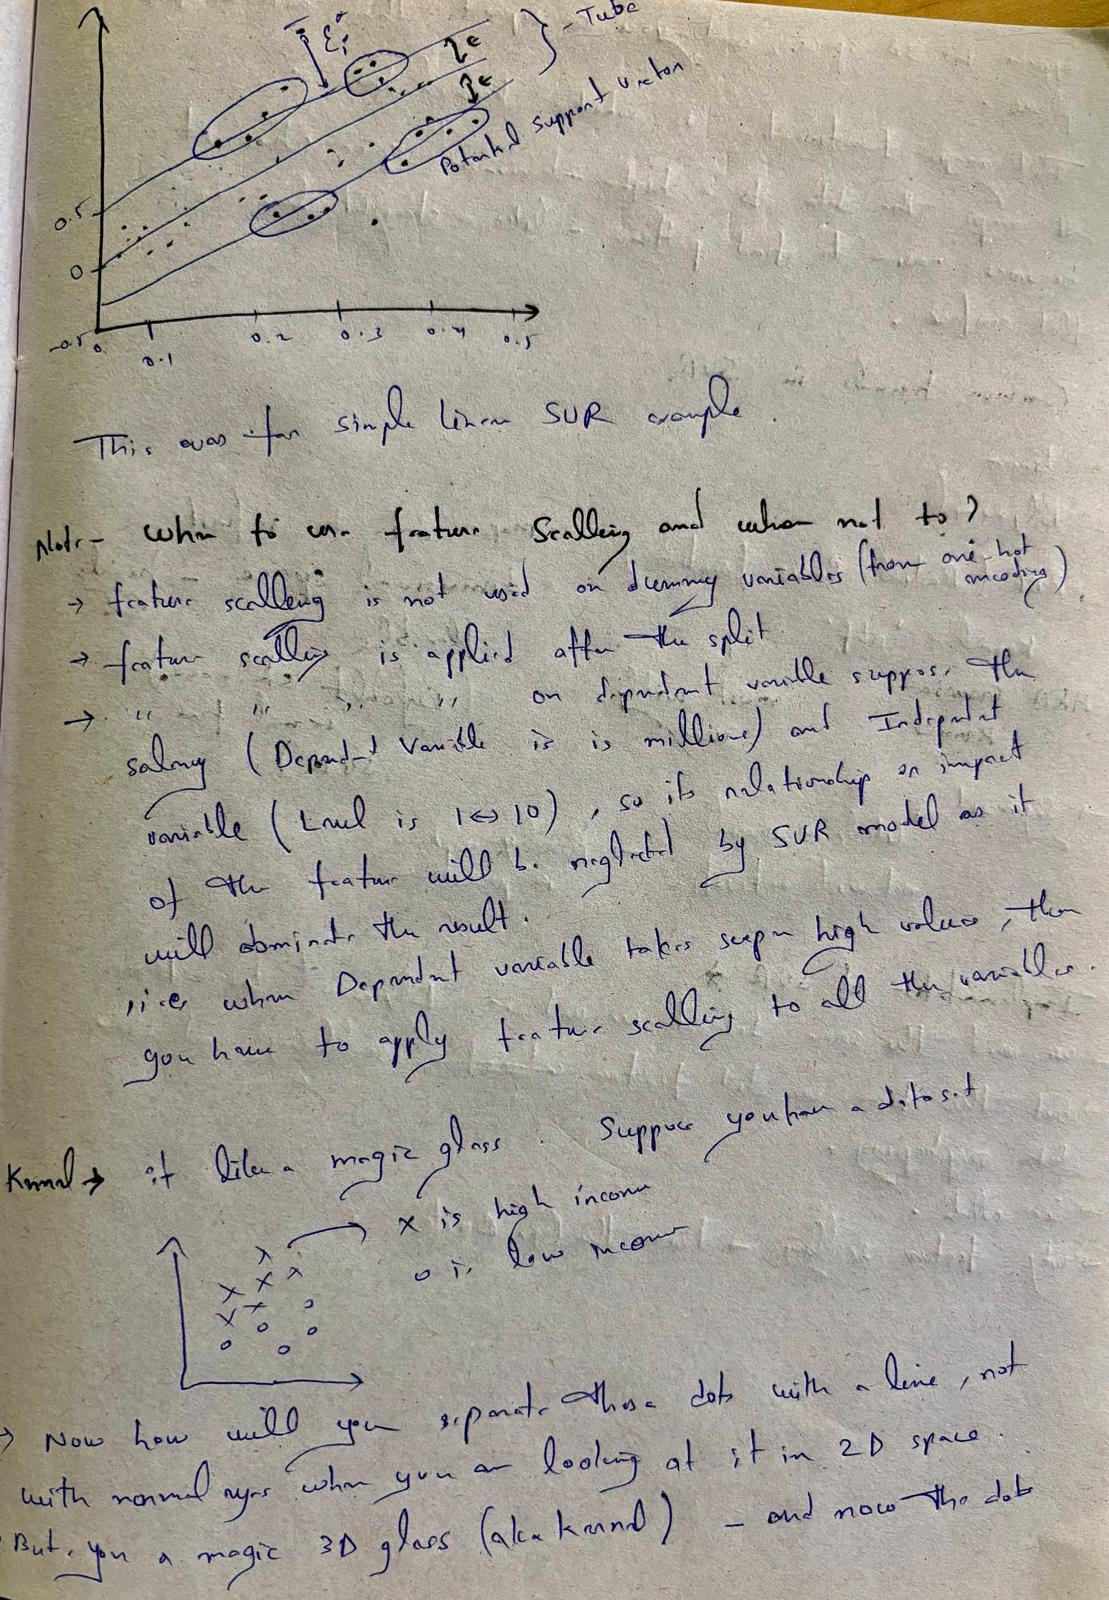

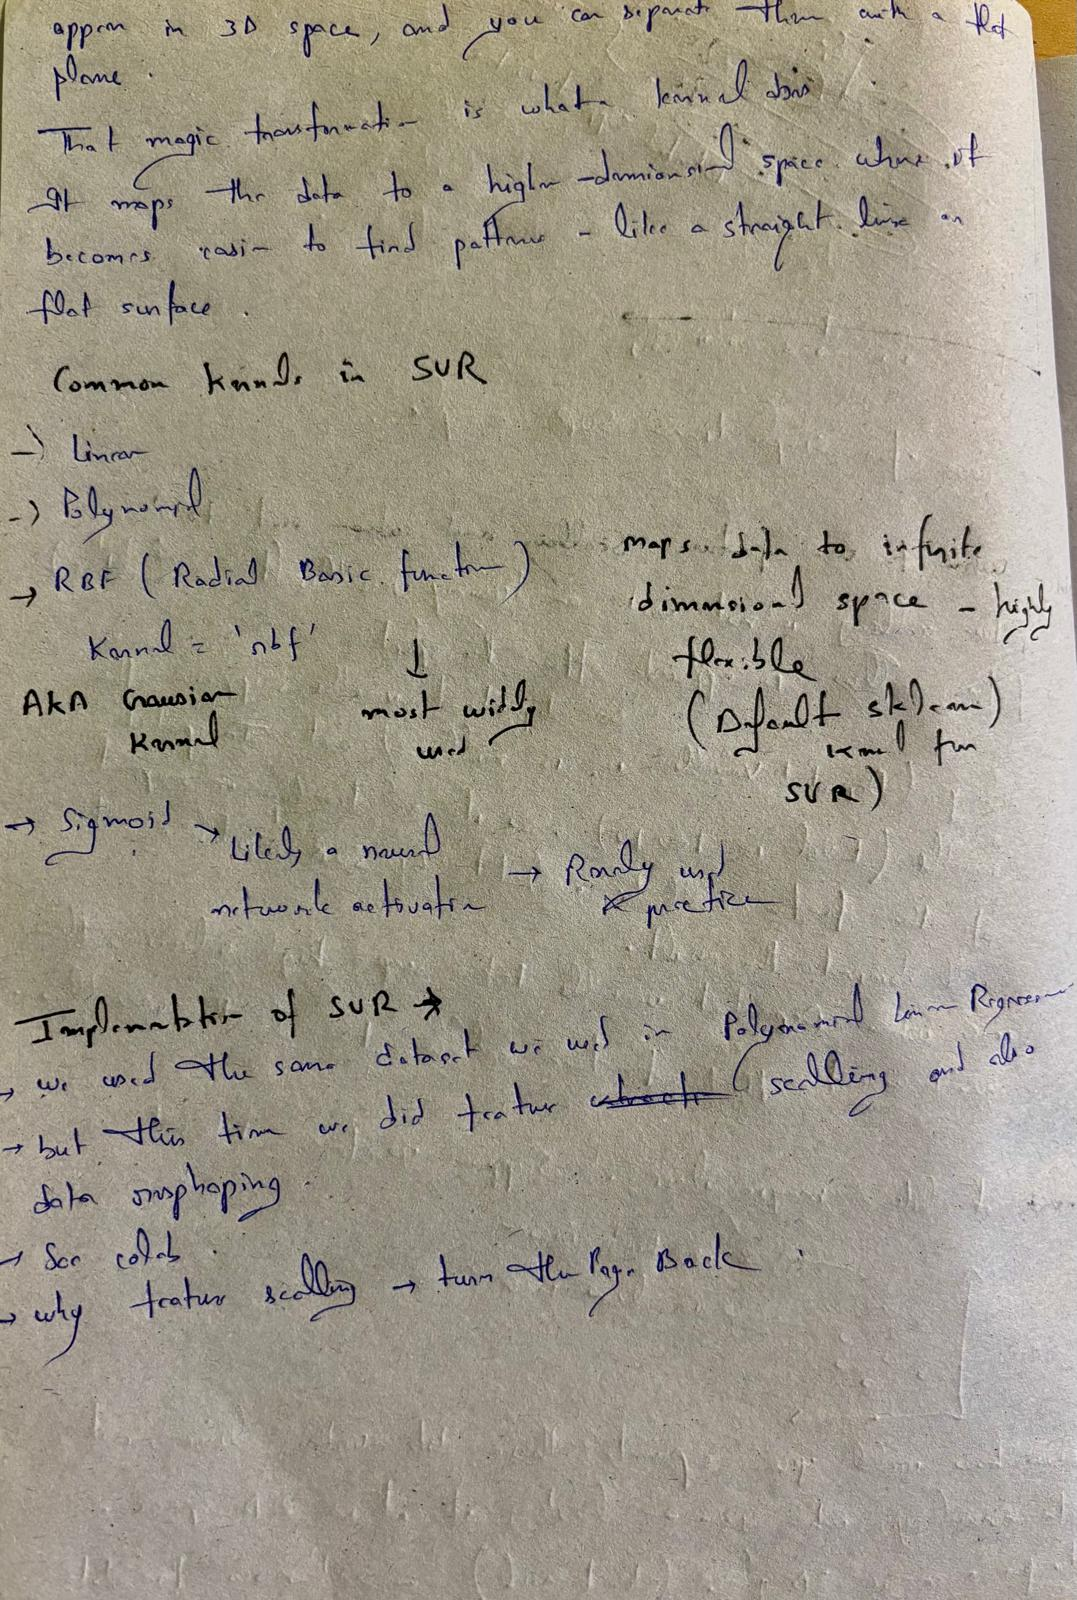

## Importing the libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [8]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [9]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [10]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [11]:
y = y.reshape(len(y),1)

Excellent question, Tushar! Understanding **why we reshape data** is super important, especially when using libraries like **NumPy** and **scikit-learn**, which often require specific input shapes.

---

## 🎯 Short Answer:

> **Reshaping is needed to match the expected input format of machine learning models or functions.**

---

## 🧠 Long Explanation with Example

Let’s say you have this:

```python
X = [1, 2, 3, 4, 5]
```

This is a **1D array** of shape:

```python
(5,)  ← Just 5 values in a line
```

But machine learning models in `scikit-learn` expect `X` to be a **2D array**, where:

* Rows = data points (samples)
* Columns = features per point

So it should be reshaped to:

```python
[[1],
 [2],
 [3],
 [4],
 [5]]
```

Now the shape is:

```python
(5, 1)  ← 5 rows, 1 feature column
```

---

## 📦 When Reshaping Is Required

| Situation                 | Why You Reshape                                            |
| ------------------------- | ---------------------------------------------------------- |
| Using `StandardScaler`    | It expects a 2D array (rows × features)                    |
| Using `SVR.predict()`     | Input must be 2D — each row = 1 data point                 |
| Inverting transformations | `.inverse_transform()` also expects 2D shape               |
| Training models           | Models need matrix format: shape `(n_samples, n_features)` |

---

## 🔧 Python Code Example

```python
import numpy as np

X = np.array([1, 2, 3, 4, 5])     # Shape: (5,)
X = X.reshape(-1, 1)              # Shape becomes: (5, 1)
```

* `reshape(-1, 1)` means:

  * “Let NumPy decide how many rows (`-1`)”
  * “I want 1 column (i.e., 1 feature)”

---

## ❌ What Happens If You Don't Reshape?

```python
scaler.fit_transform([1, 2, 3, 4, 5])
```

Throws an error like:

```
Expected 2D array, got 1D array instead
```

So reshaping is like **giving the model the input in the format it can understand**.

---

## ✅ Summary

| Shape    | Meaning                                                                  |
| -------- | ------------------------------------------------------------------------ |
| `(5,)`   | 1D array → not valid for ML models                                       |
| `(5, 1)` | 2D column vector → ✅ correct format                                      |
| `(1, 5)` | 2D row vector → not usually valid unless you have 5 features in 1 sample |

---



In [12]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

Yes, you're exactly right, Tushar — and that’s an important observation!

Let me clarify the **flow of data and fitted values** when using `StandardScaler` for both `X` and `y`.

---

## ✅ The Key Line You're Referring To

```python
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))
```

Yes — this does two things:

1. **`fit`**: Learns the **mean** and **standard deviation** from the original data
2. **`transform`**: Applies the standardization to the data

Then stores the result back in `X` and `y`.

---

### 🔍 So what's stored in `X` and `y` now?

| Variable | What's in it now?   | Meaning                                    |
| -------- | ------------------- | ------------------------------------------ |
| `X`      | Scaled feature data | `X_scaled = (X_original - mean_X) / std_X` |
| `y`      | Scaled target data  | `y_scaled = (y_original - mean_y) / std_y` |

So yes — you're overwriting the original `X` and `y` with their **scaled versions**.

---

## 🧠 What About the Scalers `sc_X` and `sc_y`?

These objects **retain the original mean and std**, so that you can:

* Use `.transform(...)` on new inputs (e.g., `[[6.5]]`)
* Use `.inverse_transform(...)` to get predictions back in original units

So even though `X` and `y` are now **scaled**, the scalers remember **how to reverse it**.

---

### ✅ Example Behind the Scenes

Let’s say your original feature values were:

```python
X = [[1], [2], [3], [4], [5]]
```

After:

```python
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
```

* `X` now becomes:

  ```python
  [[-1.41], [-0.71], [0.0], [0.71], [1.41]]
  ```

* But `sc_X` still remembers:

  * `mean = 3`
  * `std = 1.41`

So you can later do:

```python
sc_X.inverse_transform([[0.0]]) → [[3.0]]
```

---

## 📌 Summary

| Concept              | Explanation                                                       |
| -------------------- | ----------------------------------------------------------------- |
| `fit_transform(X)`   | Scales and replaces `X` with standardized values                  |
| `sc_X` / `sc_y`      | Still hold original mean and std                                  |
| `X` / `y`            | Are now scaled                                                    |
| Used for prediction? | Yes, because SVR expects scaled inputs and outputs                |
| Later reverse it?    | Use `inverse_transform(...)` to get predictions in original units |

---

In [14]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [15]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [16]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [17]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

You're asking exactly the right question, Tushar! Let's take that line:

```python
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))
```

and **fully break it down** — both **in terms of syntax** and **conceptual flow** — including what each function is referencing and why it's used.

---

## 🧠 Big Picture

> You're using this line to **predict salary for position level 6.5** using an SVR model trained on **scaled data**, and you're converting the result back to the **original salary scale** (rupees/dollars).

---

### ✅ Step-by-Step Breakdown

---

### 🔹 `[[6.5]]`

* This is a 2D array containing a **single input sample** — position level `6.5`.
* Required format: `(n_samples, n_features)` → here: (1, 1)
* If you just passed `[6.5]`, it would throw an error.

---

### 🔹 `sc_X.transform([[6.5]])`

* `sc_X` is the **StandardScaler** fitted on your training feature `X` (i.e., position levels).
* You transform `[[6.5]]` using the **mean and standard deviation** learned during training.
* This gives you the **scaled input**, which SVR was trained to understand.

> **Reference**: `sc_X` knows the mean & std of the original X and uses them to standardize new inputs.

---

### 🔹 `regressor.predict(...)`

* `regressor` is your **trained SVR model** (which was trained on **scaled features**).
* You are now feeding it the **scaled input for level 6.5**.
* It outputs a **prediction in the scaled `y` space** (e.g., `[-0.12]`)

> **Reference**: SVR model expects scaled input and outputs scaled prediction because it was trained on scaled `X` and `y`.

---

### 🔹 `.reshape(-1, 1)`

* The prediction from SVR is a **1D array** like:

  ```python
  array([-0.12])
  ```

* But `sc_y.inverse_transform()` expects a **2D array**, so you reshape it to:

  ```python
  array([[-0.12]])
  ```

> **Reference**: `.reshape(-1, 1)` makes the prediction shape match what `sc_y.inverse_transform()` expects: `(n_samples, n_targets)`

---

### 🔹 `sc_y.inverse_transform(...)`

* `sc_y` is the **StandardScaler** fitted on your target variable `y` (salaries).
* This method **reverses the scaling** so the prediction is converted **back to original salary units**.

> **Reference**: `sc_y` contains the mean & std of the original salary data and uses them to undo the scaling.

---

## ✅ Final Result

You now get the **actual predicted salary** for level 6.5 — like:

```python
array([[165000.]])
```

This is what the model thinks someone at level 6.5 should earn.

---

## 📌 Full Syntax Reference Table

| Component                     | Object         | Type        | Purpose                                        |
| ----------------------------- | -------------- | ----------- | ---------------------------------------------- |
| `sc_X`                        | StandardScaler | fitted on X | scales input features                          |
| `sc_X.transform(...)`         | method         | function    | converts raw level (6.5) to scaled version     |
| `regressor.predict(...)`      | SVR model      | method      | predicts scaled salary                         |
| `.reshape(-1,1)`              | NumPy method   | function    | reshapes 1D output to 2D for inverse transform |
| `sc_y.inverse_transform(...)` | StandardScaler | function    | converts predicted salary back to real value   |

---

## 🧠 One-Liner Summary

> You're taking a real-world input (6.5), scaling it to match the training data, predicting a salary in the scaled space, reshaping it, and then converting that prediction back to the original salary scale.

---


## Visualising the SVR results

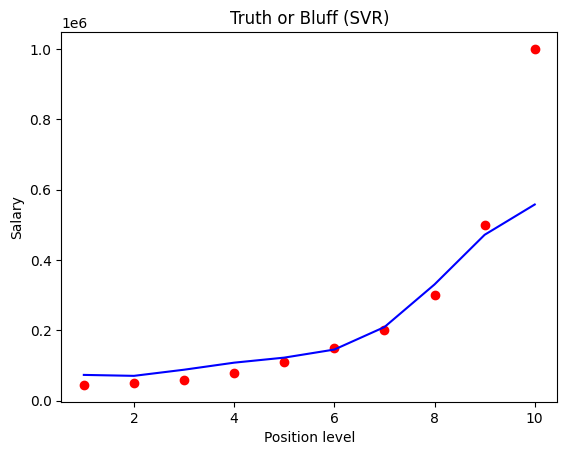

In [18]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Great! You're asking about these two lines:

```python
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
```

Let me break them down clearly — **these two lines plot your actual data and your SVR model's predictions**, but they also **convert the scaled data back to the original values**.

---

## 🔴 Line 1: `plt.scatter(...)`

```python
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
```

### 🔍 What it does:

* **Plots the real data points (X vs y)** as red dots.

But there's a catch:
Your `X` and `y` were **scaled using `StandardScaler()`** earlier — so they don’t have their original real-world values (like Position Level = 7.5, Salary = \$200K).

So before plotting, you need to **undo the scaling**.

### ✨ Explanation of Each Part:

* `sc_X.inverse_transform(X)` → converts scaled `X` back to real Position Levels
* `sc_y.inverse_transform(y)` → converts scaled `y` back to real Salaries
* `plt.scatter(..., color='red')` → plots these values as red points

### ✅ Purpose:

> Show the **original data points** on the graph — in human-readable numbers.

---

## 🔵 Line 2: `plt.plot(...)`

```python
plt.plot(sc_X.inverse_transform(X),
         sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),
         color = 'blue')
```

### 🔍 What it does:

* Plots the **SVR model’s predictions** as a blue curve.

Just like before:

* You trained `regressor` on **scaled `X`**
* It returns **scaled predictions**: values like `-0.23`, `0.78` (not in actual salary units)

So you must:

1. **Predict** using `regressor.predict(X)` → gives scaled salary
2. **Reshape** it with `.reshape(-1, 1)` → so that inverse\_transform works (it expects 2D)
3. **Convert back** using `sc_y.inverse_transform(...)`
4. **Plot vs** `sc_X.inverse_transform(X)` — the original position levels

### ✅ Purpose:

> Show the **predicted salary curve** over original position levels — in actual units.

---

## 👁️ Summary (In Simple Terms)

| Line               | Does What?                                    |
| ------------------ | --------------------------------------------- |
| `plt.scatter(...)` | Shows the real (original) data points         |
| `plt.plot(...)`    | Shows the predicted curve (in original units) |

Both use `inverse_transform()` because **SVR works on scaled data**, and you want to **show everything in human-understandable form**.




## Visualising the SVR results (for higher resolution and smoother curve)

/tmp/ipython-input-19-1412826726.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


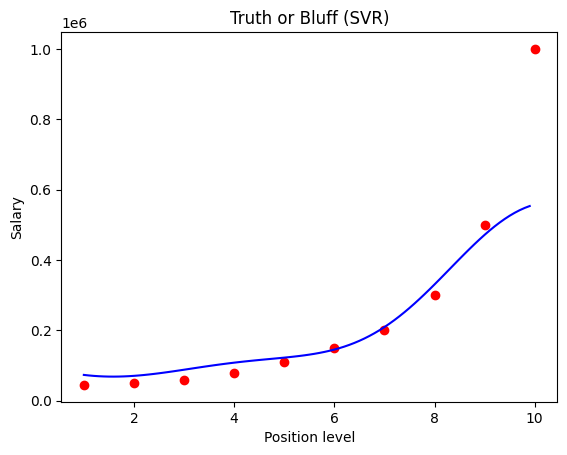

In [19]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()